In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

"Security-wise Price volume & Deliverable postion data" obtained from :
    https://www.nseindia.com/products/content/equities/equities/eq_security.htm

In [3]:
data_file = "rcom.csv"

Corporate Announcements data obtained from : https://www.nseindia.com/corporates/corporateHome.html?id=eqCorpAnnouncements&radio_btn=company&param=INFY

In [4]:
#events_file = "infy events.csv"

In [5]:
def get_data(data_file):
    data = pd.read_csv(data_file)
    colnames = {
            'Symbol':"sym", 'Series':"ser", 'Date':"date", 
            'Prev Close':"pc", 'Open Price':"o", 'High Price':"h",
            'Low Price':"l", 'Last Price':"ltp", 'Close Price':"c", 
            'Average Price':"ap",'Total Traded Quantity':"totalqty", 
            'Turnover':"turnover",'No. of Trades':"trades", 
            'Deliverable Qty':"delqty",'% Dly Qt to Traded Qty':"delbytotal"
           }
    data.rename(columns = colnames, inplace = True)
    data['sma5'] = data.c.rolling( window = 5).mean()
    data['sma8'] = data.c.rolling( window = 8).mean()
    data['change'] = data.c.diff()
    data["date"] = pd.to_datetime(data.date)
    data = data.sort_values(by = ["date"])
    data = data.set_index(pd.DatetimeIndex(data["date"]))
    return data

In [6]:
data = get_data(data_file)
data.head()

,sym,ser,date,pc,o,h,l,ltp,c,ap,totalqty,turnover,trades,delqty,delbytotal,sma5,sma8,change
date,,,,,,,,,,,,,,,,,,
2018-01-01,RCOM,EQ,2018-01-01,36.15,37.25,37.45,33.60,35.10,35.35,35.68,352686945,1.258412e+10,329462,30726809,8.71,NaN,NaN,NaN
2018-01-02,RCOM,EQ,2018-01-02,35.35,35.25,35.45,31.15,32.30,32.40,33.17,285012342,9.454118e+09,248814,31619769,11.09,NaN,NaN,-2.95
2018-01-03,RCOM,EQ,2018-01-03,32.40,32.00,32.15,30.10,30.55,30.55,30.84,233379852,7.196605e+09,190505,26191379,11.22,NaN,NaN,-1.85
2018-01-04,RCOM,EQ,2018-01-04,30.55,30.50,34.90,28.15,33.90,33.30,31.05,413019383,1.282302e+10,331332,36379168,8.81,NaN,NaN,2.75
2018-01-05,RCOM,EQ,2018-01-05,33.30,34.60,36.15,33.35,33.95,34.00,34.87,423033249,1.475118e+10,349227,38681515,9.14,33.12,NaN,0.70


In [9]:
def calc_rsi(prices,periods):
    prices = np.array(prices)
    changes = np.array(pd.Series(prices).diff())
    RSI_VECTOR = []
    for o in range(periods):
        RSI_VECTOR.append(np.NaN)
    for j in np.arange(1,prices.size-periods+1,1):
        ADV = []
        DEC = []
        for i in np.arange(j,j+periods,1):
            if changes[i] > 0:
                ADV.append( changes[i] )
            else:
                DEC.append(abs(changes[i]))         
        mean_ADV = sum(ADV)/periods
        mean_DEC = sum(DEC)/periods
        RS = mean_ADV / mean_DEC
        RSI = 100 - (100/(1 + RS))
        RSI_VECTOR.append(RSI)
    rsi = np.array(RSI_VECTOR)
    return(rsi)

In [10]:
rsi = calc_rsi(data.c,14)

In [13]:
def plot_ohlc(data):    
    plt.rcParams["figure.figsize"]  = [20,8]
    plt.plot(data.index, data.c, label = "Close" )
    plt.plot(data.sma5, label ="sma5")
    plt.plot(data.index, data.sma8, label ="sma8")
    plt.plot(data.o, label = "Open")
    plt.plot(data.h, label = "High")
    plt.plot(data.l, label = "Low")
    plt.legend()

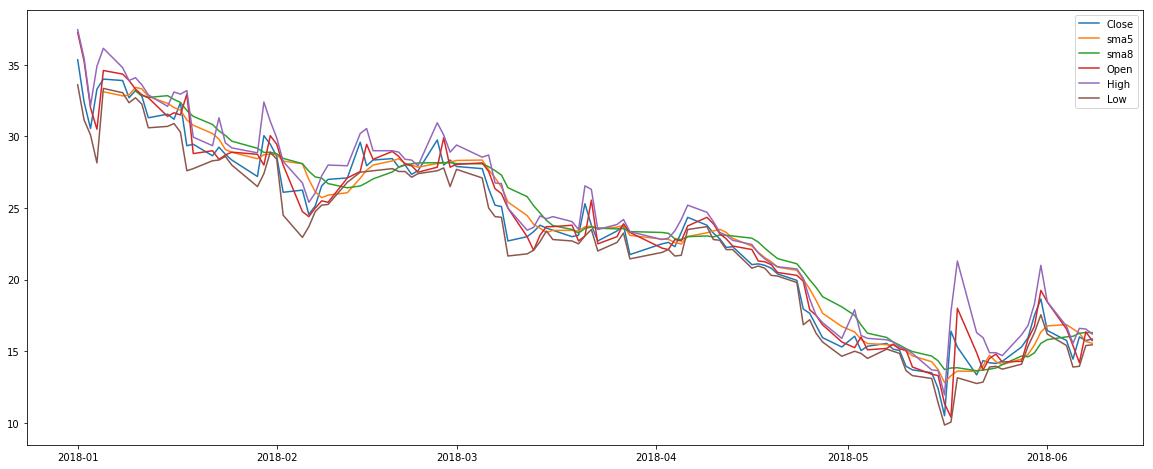

In [14]:
plot_ohlc(data)

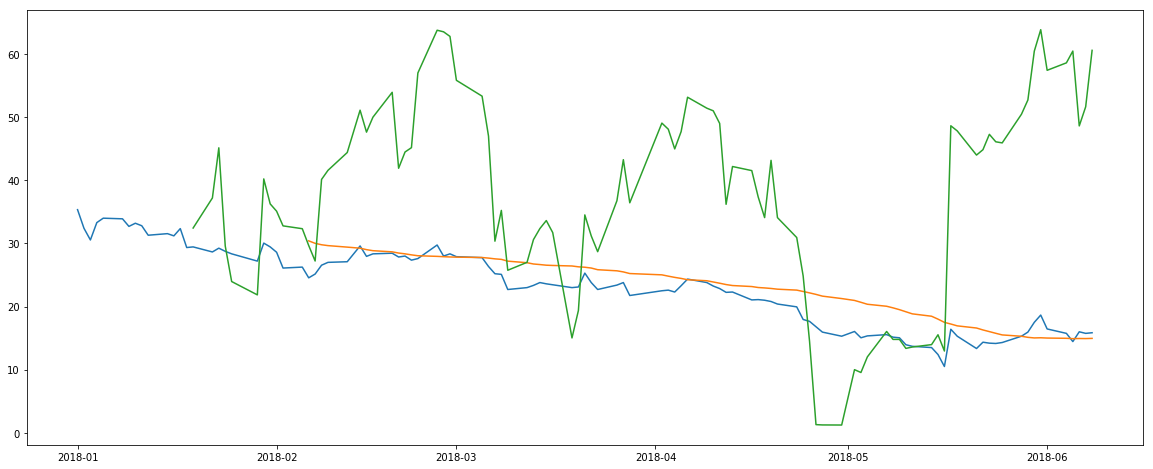

In [15]:
sma26 = data.c.rolling( window = 26).mean()
sma104 = data.c.rolling( window = 104).mean()
plt.rcParams["figure.figsize"] = [20,8]
plt.plot(data.index, data.c, label = "Close" );
plt.plot(data.index, sma26, label = "SMA_26" );
plt.plot(data.index, rsi, label = "RSI" );

In [16]:
x = np.array([1,2,3,2,1,4,5,6,3,2,4,4,5,2,4,5,5,5,3,2])
x.size

20

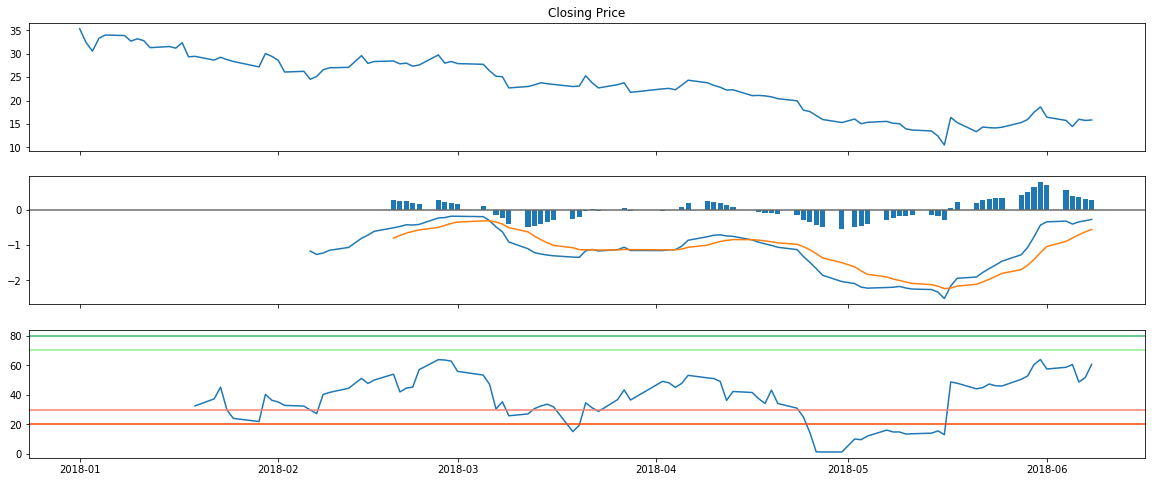

In [17]:
ema12 = data.c.ewm(span=12, min_periods = 12, adjust=True).mean()
ema26 = data.c.ewm(span=26, min_periods = 26, adjust=True).mean()
macd  = ema12 - ema26
sig = macd.ewm(span=9, min_periods = 9, adjust=True).mean()
bars  = macd-sig
#plt.rcParams["figure.figsize"] = [20,8]
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(data.index, data.c)
axarr[0].set_title('Closing Price')
axarr[1].plot(data.index, macd)
axarr[1].plot(data.index, sig)
axarr[1].bar(data.index, bars)
axarr[1].axhline(y=0, color="dimgrey")
axarr[2].plot(data.index,rsi)
axarr[2].axhline(y=80, color="mediumseagreen")
axarr[2].axhline(y=70, color="lightgreen")
axarr[2].axhline(y=30, color="salmon")
axarr[2].axhline(y=20, color="orangered")

In [132]:
rsi

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 60.29411765,
       63.21428571, 60.40955631, 55.89353612, 70.        , 57.08661417,
       52.8       , 56.45756458, 46.49122807, 52.8       , 50.62761506,
       43.93305439, 46.18473896, 52.99539171, 54.86725664, 48.68421053,
       50.        , 42.08333333, 39.83050847, 55.60538117, 60.69868996,
       48.90829694, 44.09448819, 37.99126638, 39.31623932, 38.01652893,
       42.7480916 , 45.58823529, 40.16064257, 44.62809917, 52.54237288,
       61.99095023, 59.56521739, 62.94820717, 60.08403361, 67.13615023,
       78.19148936, 51.4084507 , 50.71428571, 56.81818182, 51.4893617 ,
       51.28205128, 52.71966527, 46.82539683, 49.24242424, 42.08633094,
       39.39393939, 30.23255814, 29.43396226, 28.46715328, 31.22807018,
       43.84236453, 41.34615385, 42.45283019, 40.        , 23.62

In [97]:
data.shape

(496, 18)

In [40]:
a = []
sum(a)

0

In [10]:
def get_eventsdata(events_file):
    evdata = pd.read_csv(events_file)
    evcolnames = {
                "Symbol":"sym",
                "Company":"company",
                "Industry":"industry",
                "Subject":"event",
                "Broadcast Date/Time":"datetime"
                }
    evdata.rename(columns = evcolnames, inplace = True)
    evdata["datetime"] = pd.to_datetime(evdata.datetime)
    evdata["event"] = evdata["event"].astype('category')
    evdata["date"] = evdata.datetime.dt.date
    evdata = evdata.sort_values(by = ["date"])
    evdata = evdata.set_index(pd.DatetimeIndex(evdata["date"]))
    return evdata["2018"]

In [11]:
evdata = get_eventsdata(events_file)

In [12]:
evdata.dtypes

sym                 object
company             object
industry            object
event             category
datetime    datetime64[ns]
date                object
dtype: object

In [13]:
evdata["event"].describe()

count                71
unique               13
top       Press Release
freq                 35
Name: event, dtype: object

In [14]:
print(evdata["event"].unique()[0])

Press Release
